In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./ds_salaries.csv", index_col=[0])
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
141,2021,SE,FT,Data Science Manager,240000,USD,240000,US,0,US,L
316,2022,EN,FT,Data Engineer,35000,GBP,45807,GB,100,GB,M
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
261,2021,SE,FT,Data Analyst,54000,EUR,63831,DE,50,DE,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Work year')

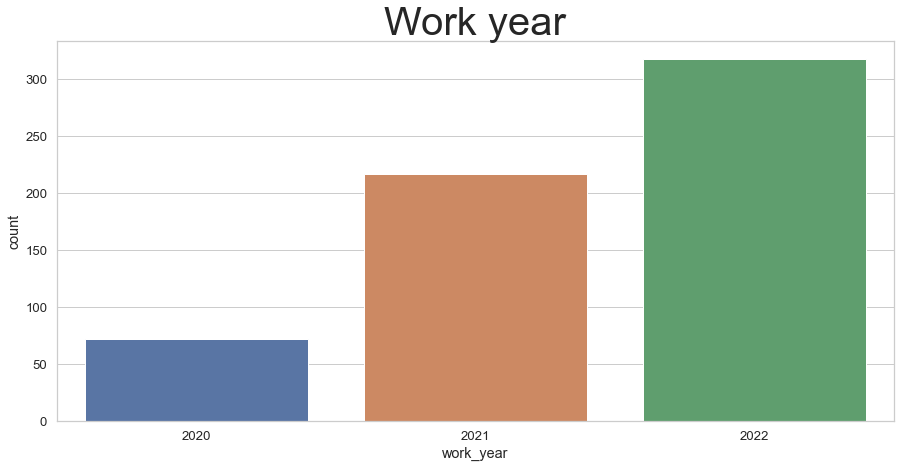

In [7]:
sns.countplot(df['work_year'])
plt.title('Work year', fontsize=40)

Text(0.5, 1.0, 'What is the most frequent Job title?')

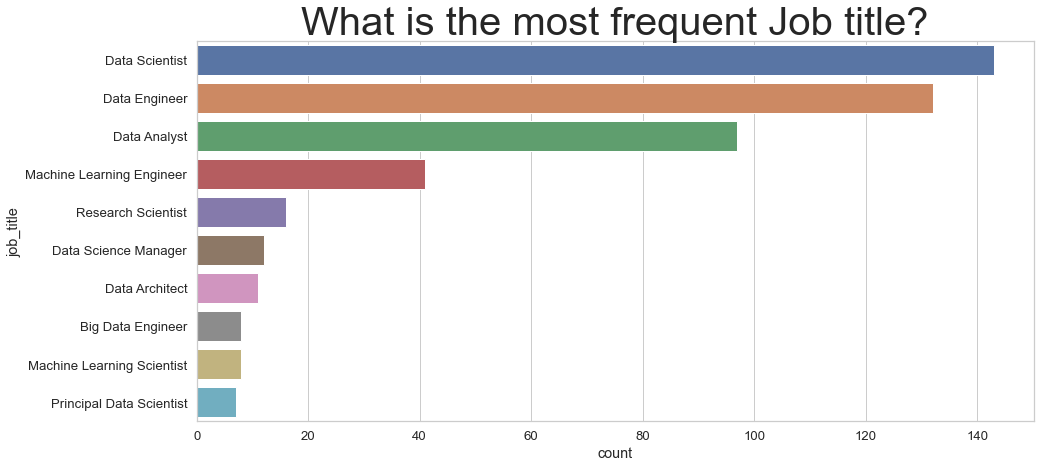

In [8]:
sns.countplot(y=df['job_title'], order=df['job_title'].value_counts().head(10).index)
plt.title("What is the most frequent Job title?", fontsize=40)

In [9]:
experience = {
    'EN': "Entry-level / Junior",
    "MI": "Mid-level / Intermediate",
    "SE": "Senior-level / Expert",
    "EX": "Executive-level / Director"
}

In [10]:
plot = df["experience_level"].map(experience)

Text(0.5, 1.0, 'What is distribution of experience in market?')

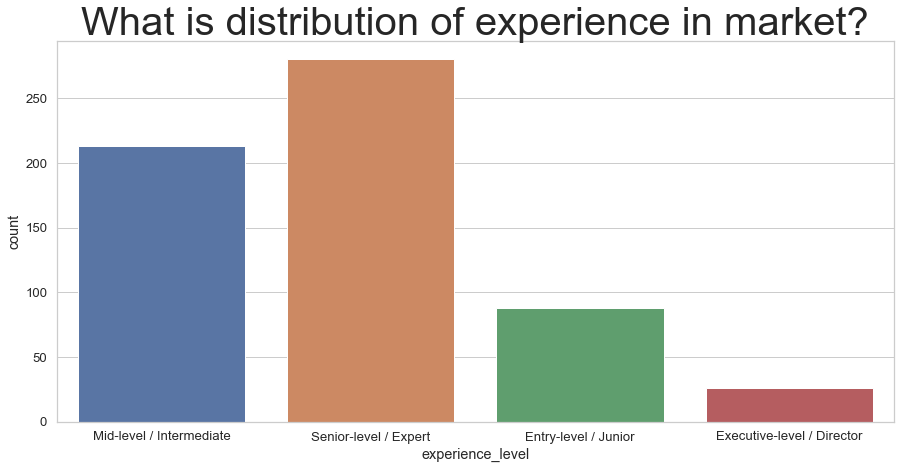

In [11]:
sns.countplot(plot)
plt.title("What is distribution of experience in market?", fontsize=40)

Text(0.5, 1.0, 'What is the remote ratio in market?')

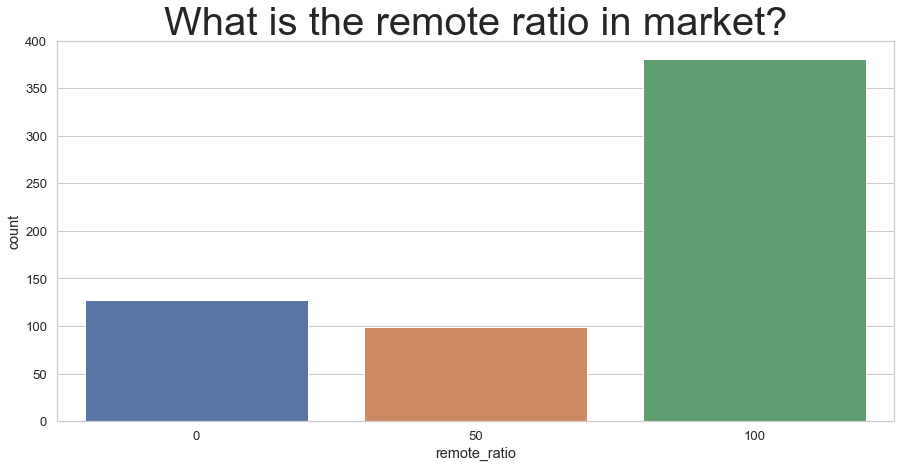

In [12]:
sns.countplot(df['remote_ratio'])
plt.title("What is the remote ratio in market?", fontsize=40)

Text(0.5, 1.0, 'How much shall companies represent in the market?')

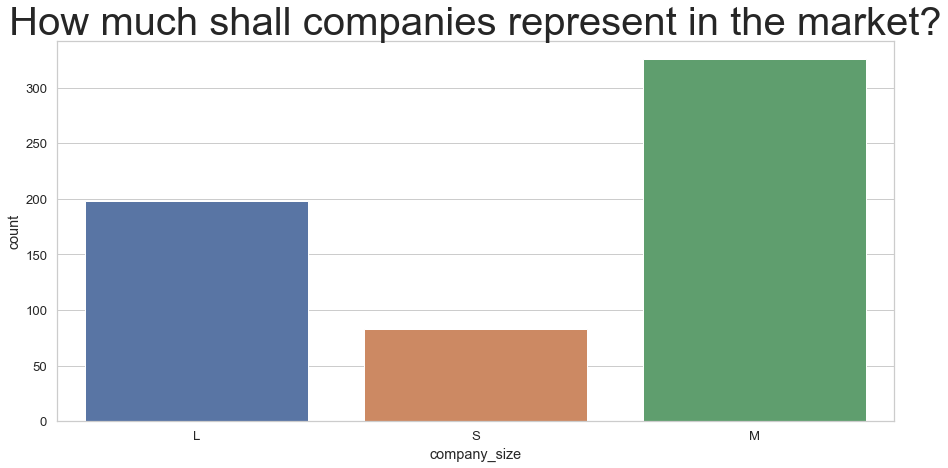

In [13]:
sns.countplot(df["company_size"])
plt.title("How much shall companies represent in the market?", fontsize=40)

Text(0.5, 1.0, 'What is the most common currency used in market?')

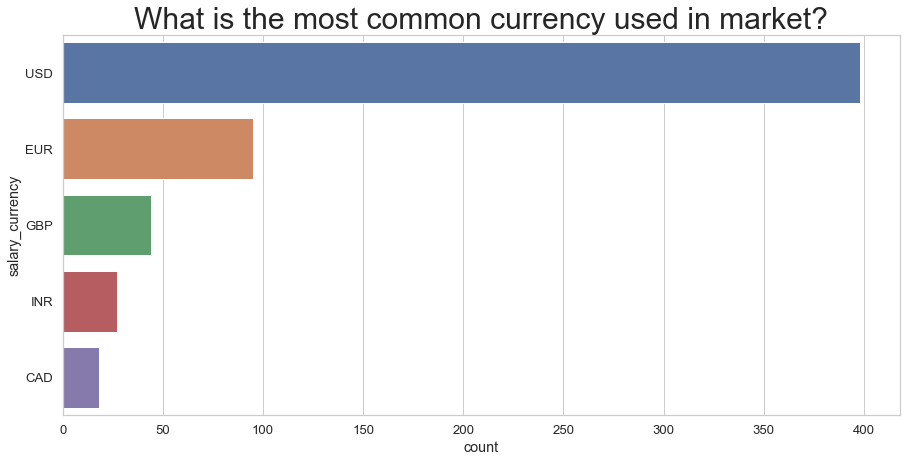

In [14]:
sns.countplot(y=df["salary_currency"], order=df["salary_currency"].value_counts().head().index)
plt.title("What is the most common currency used in market?", fontsize=30)

Text(0.5, 1.0, 'What is the most common employee residence in market?')

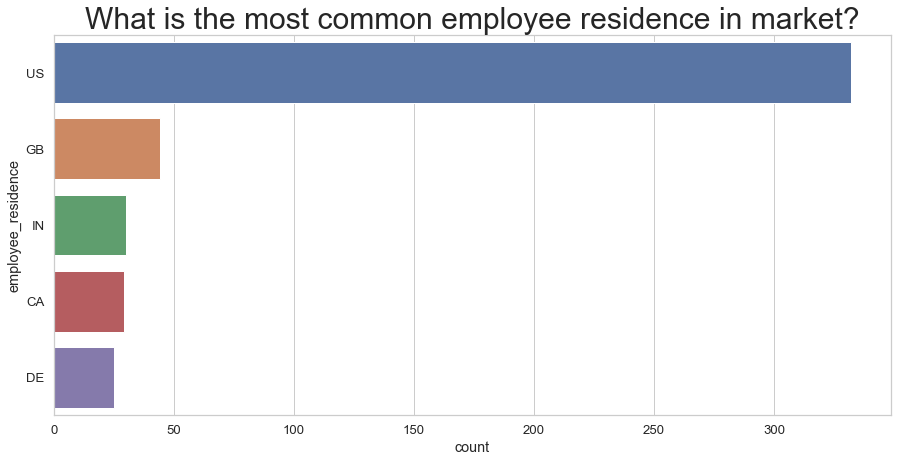

In [15]:
sns.countplot(y=df["employee_residence"], order=df["employee_residence"].value_counts().head().index)
plt.title("What is the most common employee residence in market?", fontsize=30)

Text(0.5, 1.0, 'Where is the place with the most jobs?')

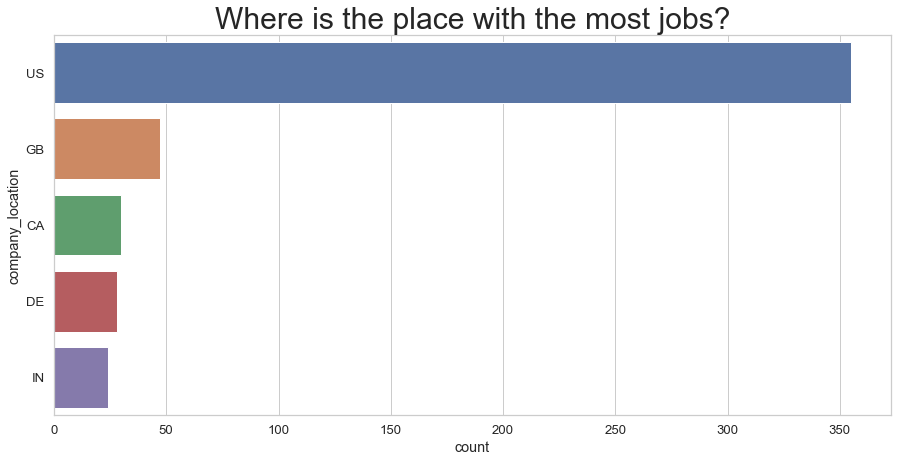

In [16]:
sns.countplot(y=df["company_location"], order=df["company_location"].value_counts().head().index)
plt.title("Where is the place with the most jobs?", fontsize=30)

Text(0.5, 1.0, 'Salary distribution')

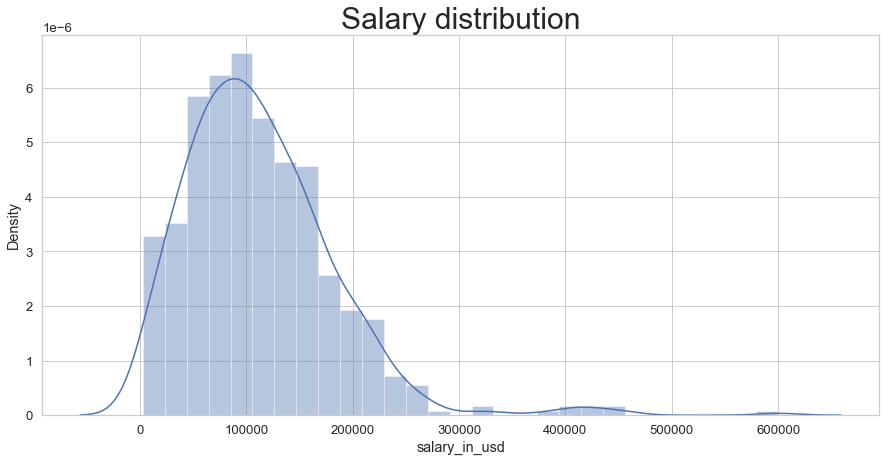

In [17]:
sns.distplot(df["salary_in_usd"])
plt.title("Salary distribution", fontsize=30)

Text(0.5, 1.0, 'Salary changes in the last three years')

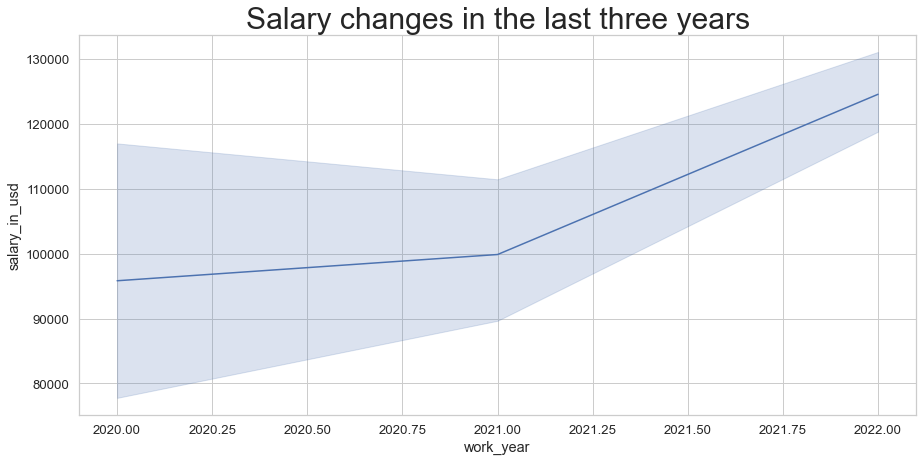

In [18]:
sns.lineplot(df["work_year"], df["salary_in_usd"])
plt.title("Salary changes in the last three years", fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and experience')

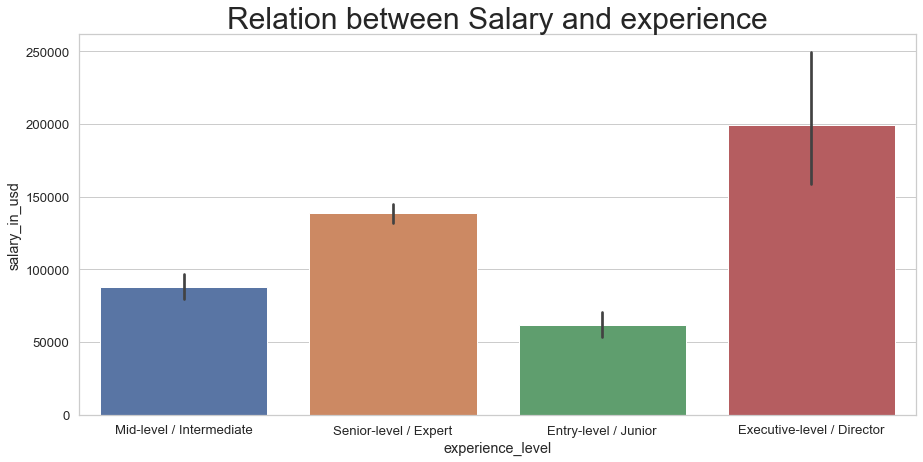

In [19]:
sns.barplot(plot, df["salary_in_usd"])
plt.title("Relation between Salary and experience", fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and company size')

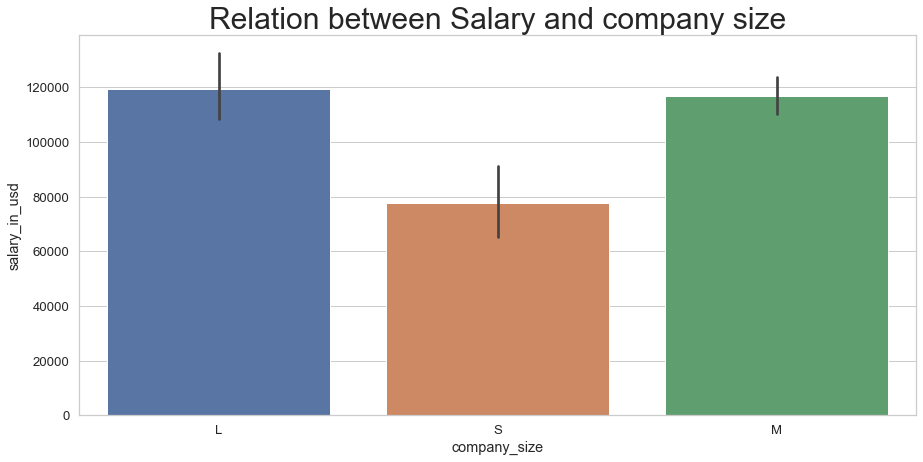

In [20]:
sns.barplot(df["company_size"], df["salary_in_usd"])
plt.title("Relation between Salary and company size", fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and employment type')

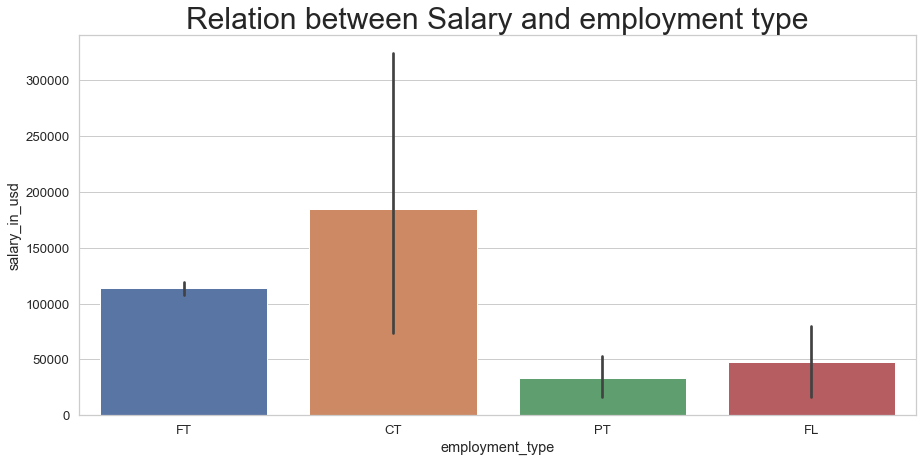

In [21]:
sns.barplot(df["employment_type"], df["salary_in_usd"])
plt.title("Relation between Salary and employment type", fontsize=30)

In [22]:
experience = {
    "EN": 0,
    "MI": 1,
    "SE": 2,
    "EX": 3
}

In [23]:
df["experience_level"] = df["experience_level"].map(experience)

In [24]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [25]:
def Titles_reduction(x):
    if x.find("Data Science") >= 0 or x.find("Data Scientist") >= 0:
        df["job_title"].replace(x, "Data Scientist", inplace=True)
    elif x.find("Analyst") >= 0 or x.find("Anayltics") >= 0:
        df["job_title"].replace(x, "Data Analyst", inplace=True)
    elif x.find("ML") >= 0 or x.find("Machine Learning") >= 0:
        df["job_title"].replace(x, "Machine Learning Engineer", inplace=True)
    elif x.find("Data Engineer") >= 0 or x.find("Data Engineering") >= 0:
        df["job_title"].replace(x, "Data Engineer", inplace=True)
    else:
        df["job_title"].replace(x, "AI related", inplace=True)

In [26]:
for i in df["job_title"]:
    Titles_reduction(i)

In [27]:
df["job_title"].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 119
AI related                    70
Machine Learning Engineer     68
Name: job_title, dtype: int64

In [28]:
size = {
    "S": 0,
    "M": 1,
    "L": 2
}

In [29]:
df["company_size"] = df["company_size"].map(size)

In [30]:
def res(x):
    if x =="US":
        return "US"
    else:
        return "Other"

In [31]:
df["employee_residence"] = df["employee_residence"].apply(res)

In [32]:
df["company_location"] = df["company_location"].apply(res)

In [33]:
df["salary_in_usd"] = np.log(df["salary_in_usd"])
df["salary_in_usd"]

0      11.287692
1      12.468437
2      11.599323
3       9.903488
4      11.918391
         ...    
602    11.944708
603    11.744037
604    11.767568
605    11.918391
606    12.206073
Name: salary_in_usd, Length: 607, dtype: float64

In [34]:
nums = df.select_dtypes(exclude="object").columns
nums

Index(['work_year', 'experience_level', 'salary', 'salary_in_usd',
       'remote_ratio', 'company_size'],
      dtype='object')

In [35]:
cats = df.select_dtypes(include="object").columns
cats

Index(['employment_type', 'job_title', 'salary_currency', 'employee_residence',
       'company_location'],
      dtype='object')

In [36]:
df = pd.get_dummies(df, columns=cats, drop_first=True)

In [37]:
df

,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,...,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD,employee_residence_US,company_location_US
0,2020,1,70000,11.287692,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,2,260000,12.468437,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,2,85000,11.599323,50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,1,20000,9.903488,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2020,2,150000,11.918391,50,2,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,2,154000,11.944708,100,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
603,2022,2,126000,11.744037,100,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
604,2022,2,129000,11.767568,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
605,2022,2,150000,11.918391,100,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1


In [38]:
X, y = df.drop("salary", axis=1), df["salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
X_train

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,...,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD,employee_residence_US,company_location_US
134,2021,0,11.512925,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
391,2022,1,11.695247,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
587,2022,2,11.849398,100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
283,2021,2,11.561716,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
186,2021,2,10.819778,100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021,2,10.915088,100,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2020,2,11.736069,50,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
359,2022,2,11.415313,100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192,2021,1,9.798127,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
nums = nums.drop("salary")

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[nums])

StandardScaler()

In [42]:
X_train[nums] = scaler.transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

In [43]:
models = {
    "Linear regression": LinearRegression(),
    "Lasso": LassoCV(),
    "Ridge": RidgeCV(),
    "ElasticNet": ElasticNetCV()
}

In [121]:
Results = {
    "Model": [],
    "Train Score": [],
    "Test Score": [],
    "RMSE": []
}

In [122]:
for name, model in models.items():
    model.fit(X_train, np.log(y_train))
    train_s = model.score(X_train, np.log(y_train))
    test_s = model.score(X_test, np.log(y_test))
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error((y_pred), np.log(y_test))
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Results["RMSE"].append(RMSE)
    print("Model: ", name)
    print("Train Score: ", train_s)
    print("Test Score: ", test_s)
    print("RMSE: ", round(RMSE, 2))
    print("==================================")

Model:  Linear regression
Train Score:  0.9997916149085472
Test Score:  0.9389057289139153
RMSE:  0.06
Model:  Lasso
Train Score:  0.9734745889861299
Test Score:  0.9662277922535101
RMSE:  0.03
Model:  Ridge
Train Score:  0.962449454892685
Test Score:  0.9578900800013912
RMSE:  0.04
Model:  ElasticNet
Train Score:  0.9828954154959527
Test Score:  0.9746290419224202
RMSE:  0.02


In [123]:
scores = pd.DataFrame(Results)

In [126]:
scores
tidy = scores.melt(id_vars="Model").rename(columns=str.title)
tidy

,Model,Variable,Value
0,Linear regression,Train Score,0.999792
1,Lasso,Train Score,0.973475
2,Ridge,Train Score,0.962449
3,ElasticNet,Train Score,0.982895
4,Linear regression,Test Score,0.938906
5,Lasso,Test Score,0.966228
6,Ridge,Test Score,0.957890
7,ElasticNet,Test Score,0.974629
8,Linear regression,RMSE,0.057542
9,Lasso,RMSE,0.031809


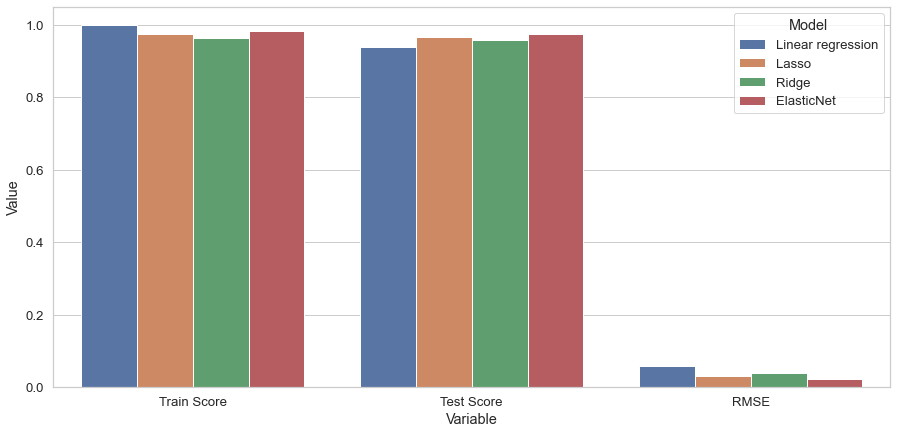

In [128]:
sns.barplot(data=tidy, x="Variable", y="Value", hue="Model")